In [3]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from jcopml.time_series.decomposition import additive_decomposition,multiplicative_decomposition

from luwiji.time_series import illustration

# Error Trend Seasonal (ETS) Smoothing Method

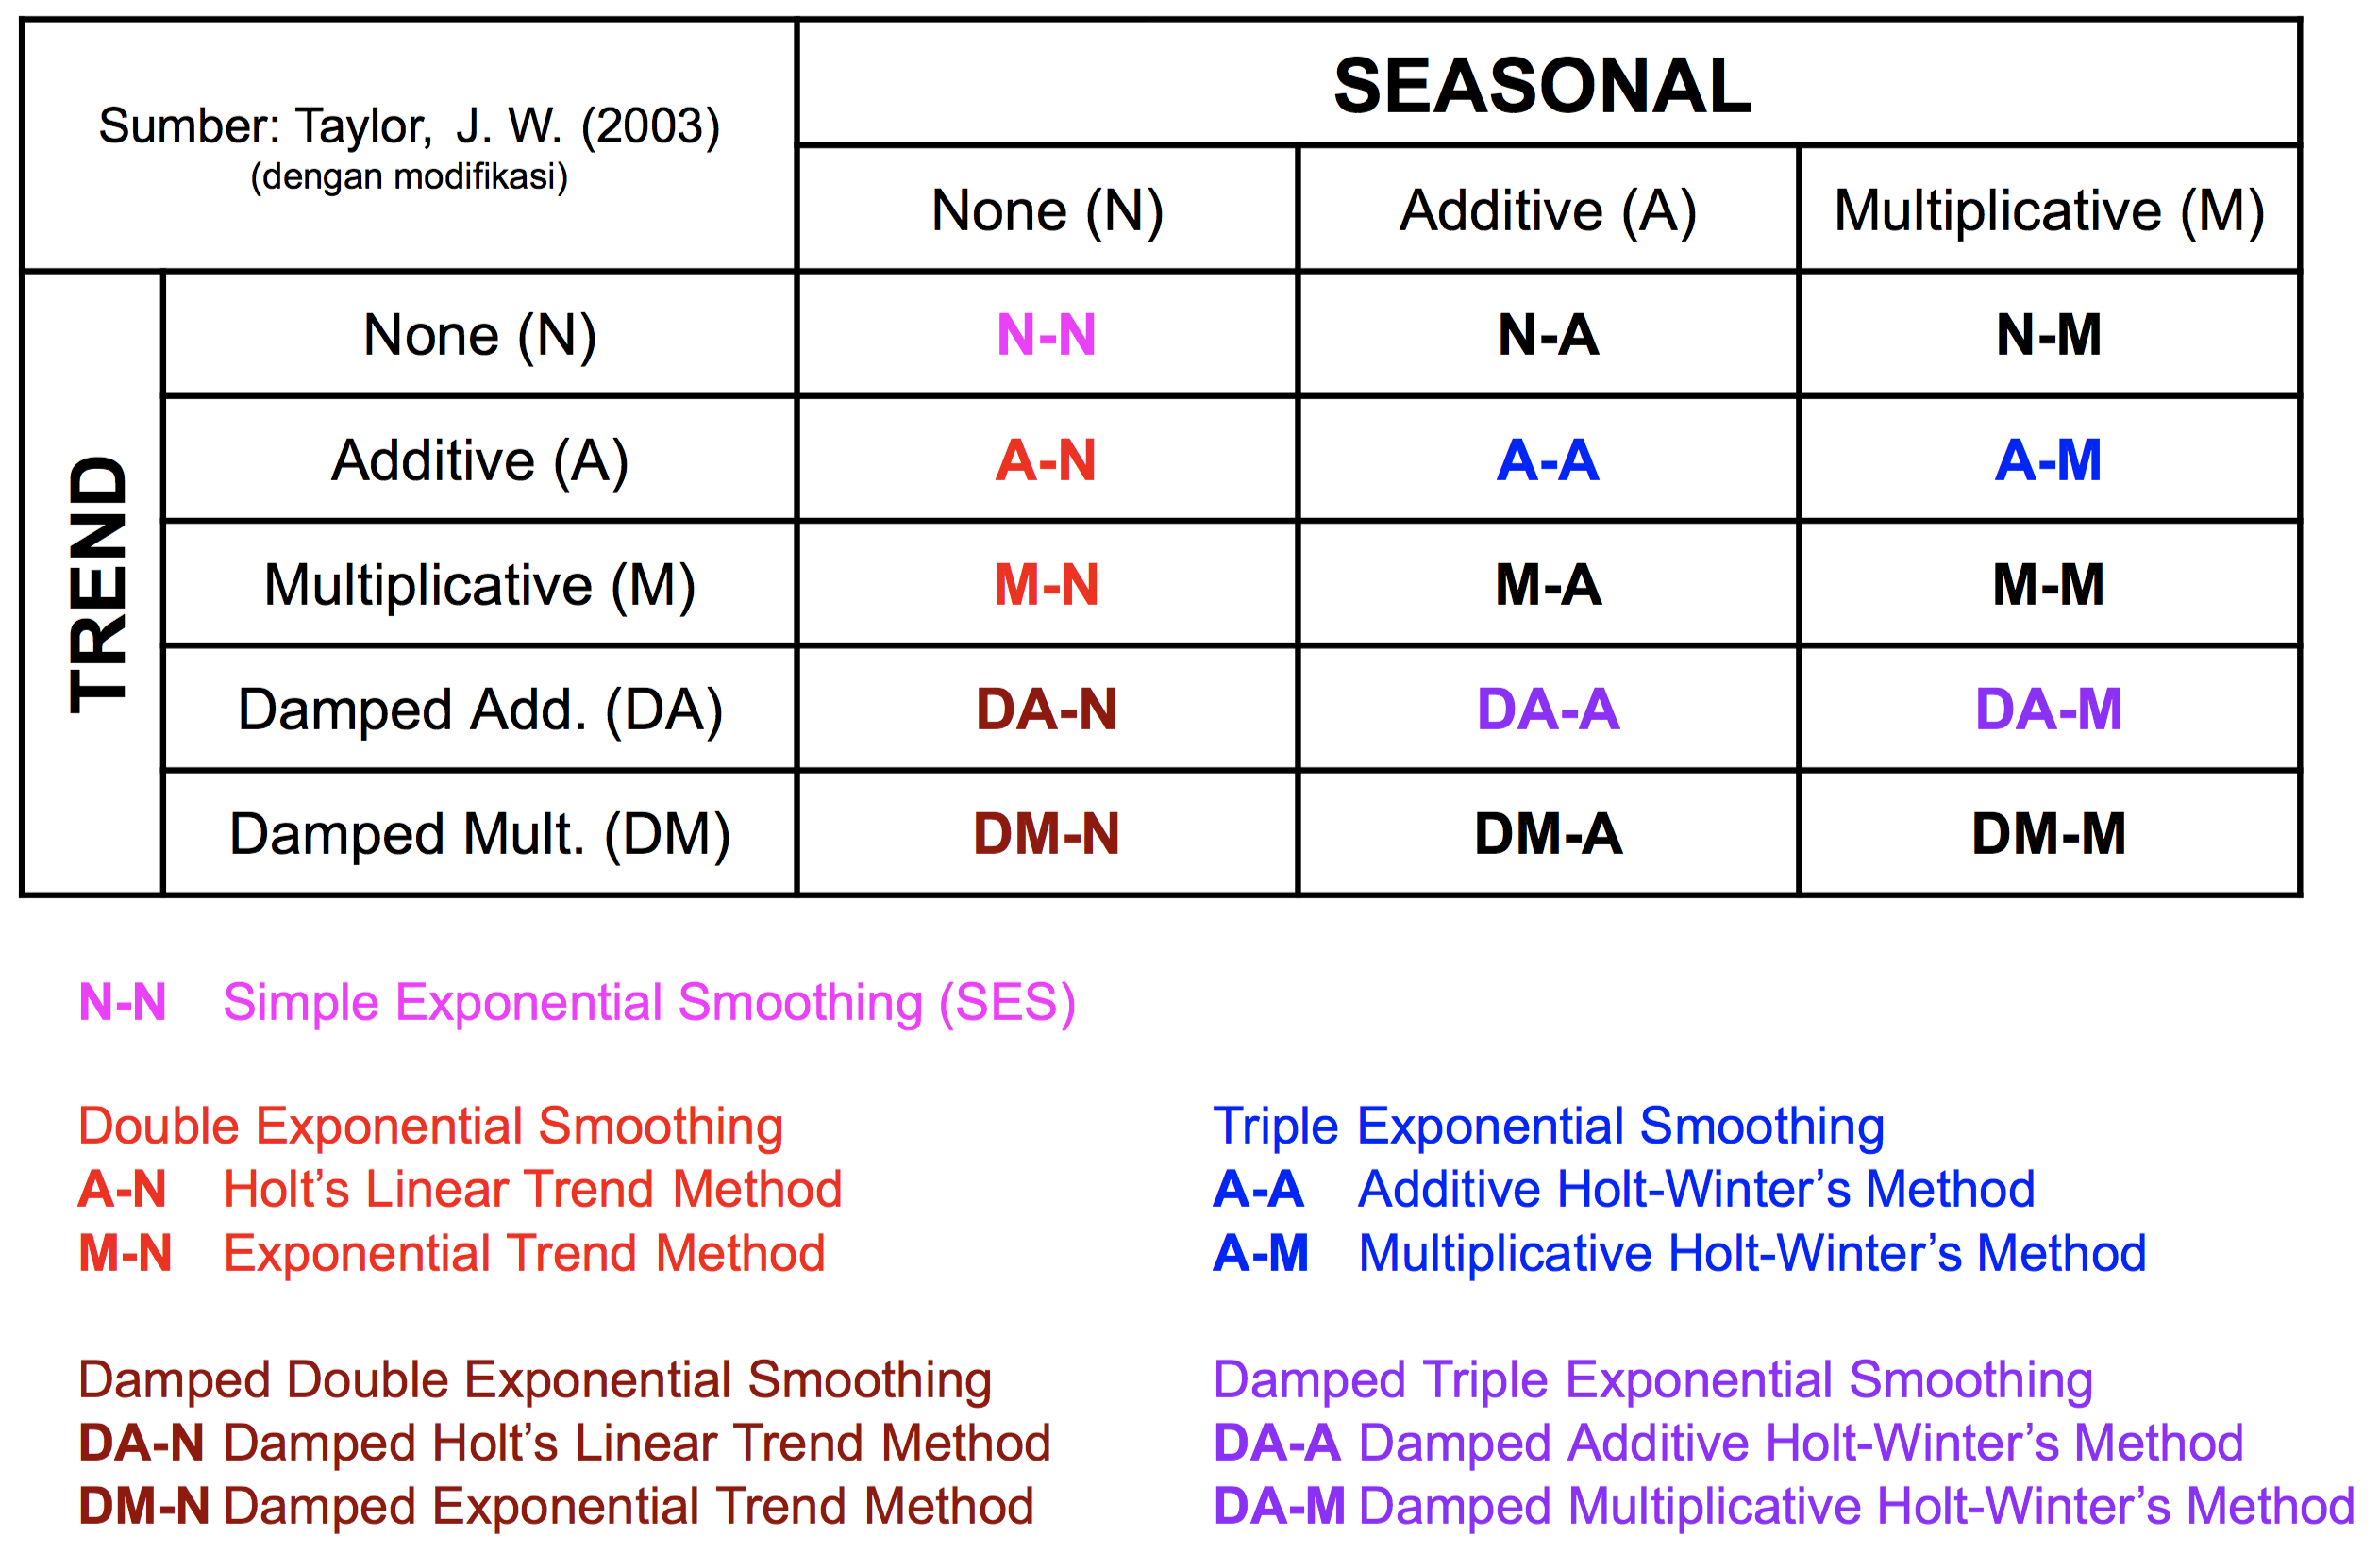

In [5]:
illustration.ets_model

# Exercise 1: Cheese Production Data

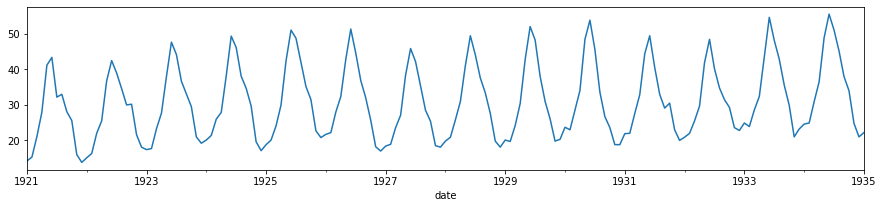

In [11]:
df=pd.read_csv('data/cheese_fred.csv',index_col='date',parse_dates=['date'])
series= df.total_cheese_production
X_train,X_test=series[:-25],series[-25:]
series.plot(figsize=(15,3))

### Training

In [19]:
es = ExponentialSmoothing(X_train,seasonal='add',seasonal_periods=12)
model=es.fit(optimized=True,use_boxcox=True)

C:\Users\irfanfadhullah\AppData\Local\Continuum\anaconda3\envs\jcop_ts\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\irfanfadhullah\AppData\Local\Continuum\anaconda3\envs\jcop_ts\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\irfanfadhullah\AppData\Local\Continuum\anaconda3\envs\jcop_ts\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\irfanfadhullah\AppData\Local\Continuum\anaconda3\envs\jcop_ts\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


### Forecasting

In [20]:
len(X_train)

144

In [21]:
pred = model.predict(len(X_train)-10,len(X_train)+50)

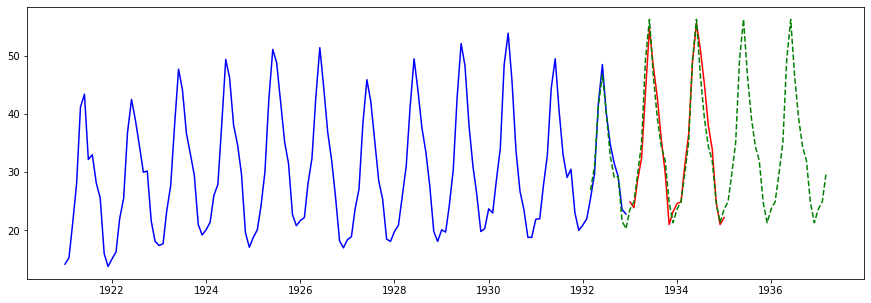

In [22]:
plt.figure(figsize=(15,5))
plt.plot(X_train,'b-',label='Train')
plt.plot(X_test,'r-',label='Test')
plt.plot(pred,'g--',label='Pred')

# Exercise 2: Airline Passenger Data

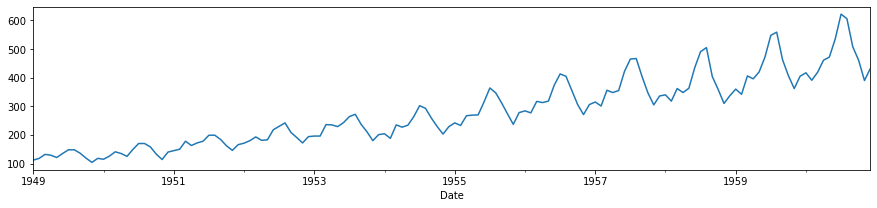

In [23]:
df=pd.read_csv('data/airline.csv',index_col='Date',parse_dates=['Date'])
series= df.passengers
X_train,X_test=series[:-25],series[-25:]
series.plot(figsize=(15,3))

In [24]:
es = ExponentialSmoothing(X_train,trend='add', seasonal='mul',seasonal_periods=12)
model=es.fit(optimized=True,use_boxcox=True)

In [25]:
len(X_train)

119

In [26]:
pred = model.predict(len(X_train)-10,len(X_train)+50)

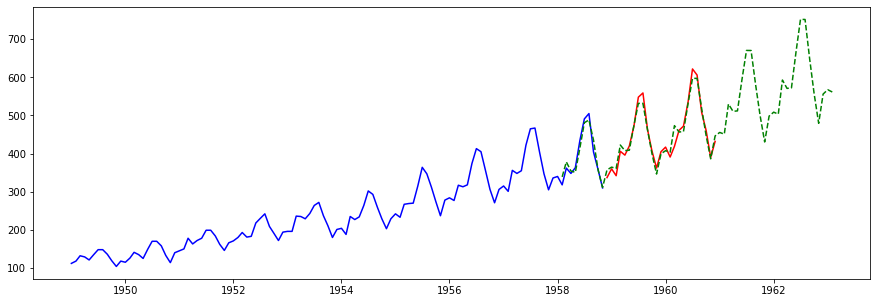

In [27]:
plt.figure(figsize=(15,5))
plt.plot(X_train,'b-',label='Train')
plt.plot(X_test,'r-',label='Test')
plt.plot(pred,'g--',label='Pred')

### Exercise 3: Airline Passenger Data

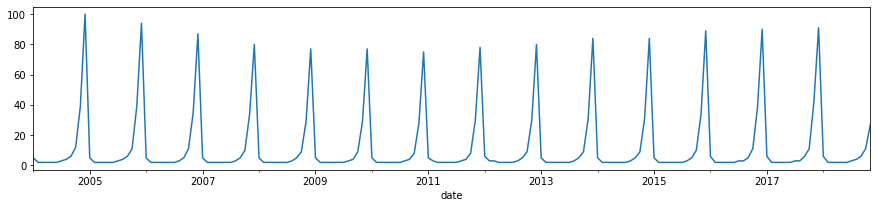

In [38]:
df=pd.read_csv('data/christmas.csv',index_col='date',parse_dates=['date'])
series= df.interest
X_train,X_test=series[:-25],series[-25:]
series.plot(figsize=(15,3))

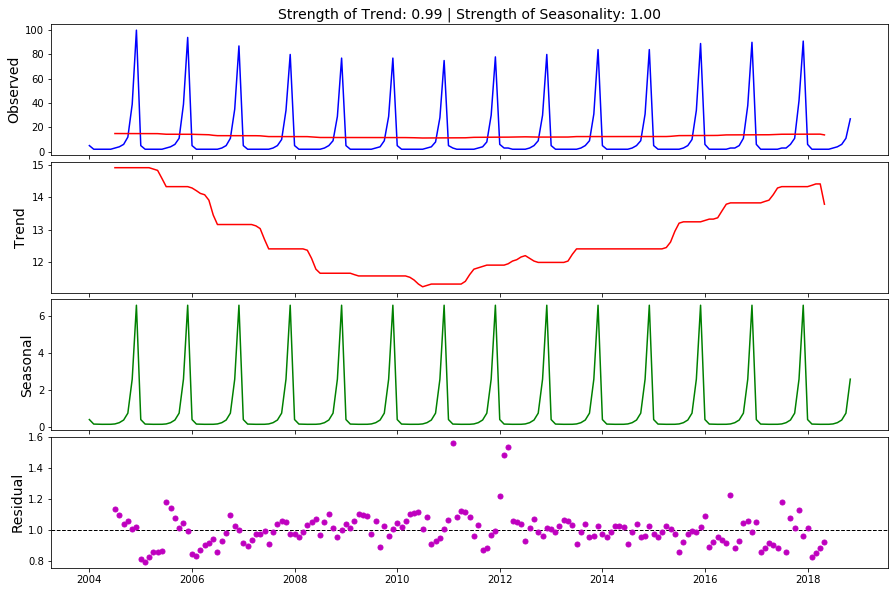

In [39]:
components = multiplicative_decomposition(series,plot=True)

In [53]:
es = ExponentialSmoothing(X_train, seasonal='mul',seasonal_periods=12)
model=es.fit(optimized=True,use_boxcox=True)

In [54]:
pred = model.predict(len(X_train)-10,len(X_train)+50)

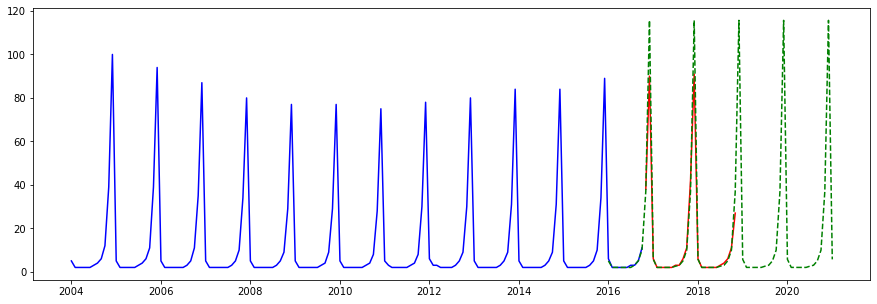

In [55]:
plt.figure(figsize=(15,5))
plt.plot(X_train,'b-',label='Train')
plt.plot(X_test,'r-',label='Test')
plt.plot(pred,'g--',label='Pred')

### Exercise 4: Champagne Sales

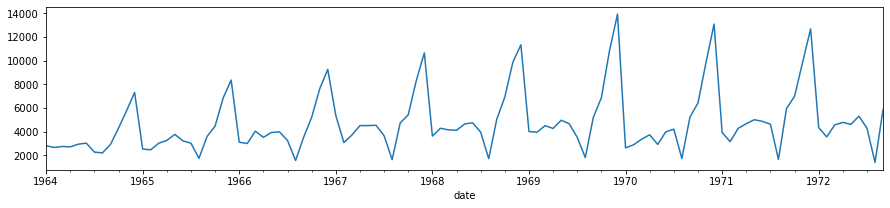

In [56]:
df=pd.read_csv('data/perrin_freres_champagne.csv',index_col='date',parse_dates=['date'])
series= df.sales
X_train,X_test=series[:-25],series[-25:]
series.plot(figsize=(15,3))

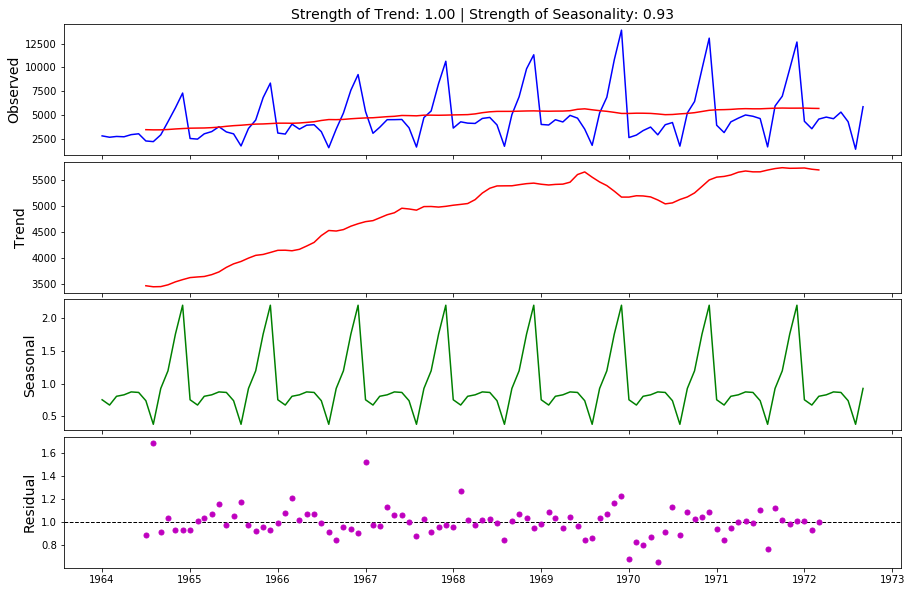

In [57]:
components = multiplicative_decomposition(series,plot=True)

In [72]:
es = ExponentialSmoothing(X_train,seasonal='mul',seasonal_periods=12)
model=es.fit(optimized=True,use_boxcox=True)

In [77]:
pred = model.predict(len(X_train)-20,len(X_train)+50)

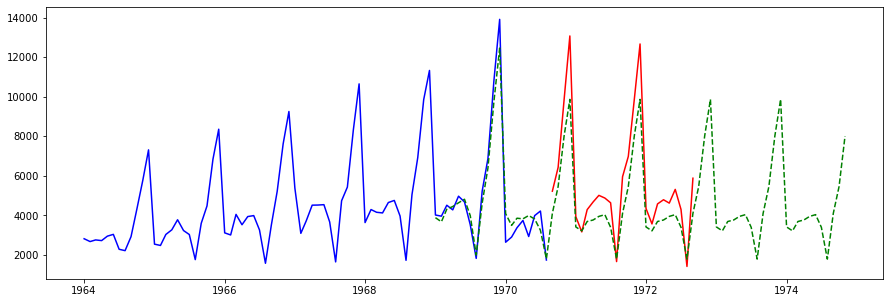

In [78]:
plt.figure(figsize=(15,5))
plt.plot(X_train,'b-',label='Train')
plt.plot(X_test,'r-',label='Test')
plt.plot(pred,'g--',label='Pred')

## Auto ETS

In [79]:
from jcopml.time_series import auto_ets

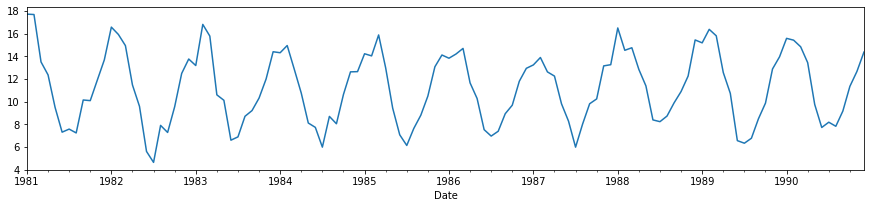

In [82]:
df=pd.read_csv('data/daily_min_temp.csv',index_col='Date',parse_dates=['Date'])
df = df.resample('M').mean()
series= df.Temp
X_train,X_test=series[:-25],series[-25:]
series.plot(figsize=(15,3))

In [83]:
model, cv_results = auto_ets(X_train,scoring='mse')

In [84]:
cv_results.head()

,trend,seasonal,damped,boxcox,mse_0,mse_1,mse_2,mse_3,mean_mse
20,mul,mul,False,False,2.626338,1.316793,0.662312,1.755076,1.590130
3,None,add,False,False,2.359033,1.136664,1.105953,1.960278,1.640482
16,mul,add,False,False,3.118712,1.406636,0.631647,1.594607,1.687900
18,mul,mul,True,False,2.612098,1.985289,0.771672,1.557321,1.731595
2,None,add,False,True,3.054488,1.112930,1.081858,1.862339,1.777904


In [85]:
pred = model.predict(len(X_train)-20,len(X_train)+50)

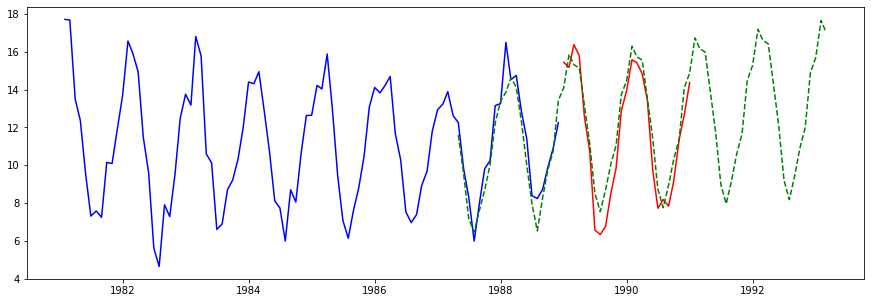

In [86]:
plt.figure(figsize=(15,5))
plt.plot(X_train,'b-',label='Train')
plt.plot(X_test,'r-',label='Test')
plt.plot(pred,'g--',label='Pred')